    Yudha Cipta M. Y.
    Hacktiv8 - Batch 01

#### introduction
This dataset collected with twint which contains Indonesian Tweets of users who have applied the following keywords: "Corona and Pemerintah" or "Covid and Pemerintah" from May to July 2020. The dataset consists of multiple variables associated with Twitter: the tweets itself, the accounts who tweeted them, hashtags used, time, some ids, and more. Preprocessing on tweets data and determine sentiment polarity of tweets with Indonesian Sentiment Lexicon (https://github.com/fajri91/InSet)


_Source_ : This dataset originally imported from kaggle: https://www.kaggle.com/dionisiusdh/covid19-indonesian-twitter-sentiment


_Objective_ : In this project i will do sentiment analysis with the topic covid19 and governnment which hopefully can reflect the opinion of citizen in early pandemic times.

### Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install PySastrawi


     |█▋                              | 10 kB 32.6 MB/s eta 0:00:01
     |███▏                            | 20 kB 8.8 MB/s eta 0:00:01
     |████▊                           | 30 kB 7.9 MB/s eta 0:00:01
     |██████▎                         | 40 kB 7.5 MB/s eta 0:00:01
     |███████▉                        | 51 kB 3.9 MB/s eta 0:00:01
     |█████████▍                      | 61 kB 4.1 MB/s eta 0:00:01
     |███████████                     | 71 kB 4.4 MB/s eta 0:00:01
     |████████████▌                   | 81 kB 4.9 MB/s eta 0:00:01
     |██████████████                  | 92 kB 5.1 MB/s eta 0:00:01
     |███████████████▋                | 102 kB 4.1 MB/s eta 0:00:01
     |█████████████████▏              | 112 kB 4.1 MB/s eta 0:00:01
     |██████████████████▊             | 122 kB 4.1 MB/s eta 0:00:01
     |████████████████████▎           | 133 kB 4.1 MB/s eta 0:00:01
     |█████████████████████▉          | 143 kB 4.1 MB/s eta 0:00:01
     |███████████████████████▍        | 153 kB 4.1 MB/s

In [3]:
!pip install googletrans

     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 1.2 MB 8.7 MB/s 
     |████████████████████████████████| 65 kB 4.7 MB/s 
     |████████████████████████████████| 53 kB 2.8 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=ddc826bd90b0147b0f06d848f7ae14b9b7f8a16ac23c27db3eec4cf7349b1dbb
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import re
from tensorflow import keras

import os
import re
import string
import nltk
import random
nltk.download('stopwords')
from textblob import TextBlob as tb
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import Counter
from subprocess import check_output
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

from googletrans import Translator
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Data Loading

In [5]:
df = pd.read_csv('/content/drive/MyDrive/final_project/covid-sentiment.csv')

In [6]:
print(df.shape)
df.head()

(52959, 11)


,conversation_id,date,time,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags
0,1258425982907637761,2020-05-07,23:58:29,1058474317,monologis_id,https://bit.ly/2L6CcbB | Seharusnya saat ini...,[],0,3,0,[]
1,1258320972198940675,2020-05-07,23:57:30,1179769476,its_dul,Klo kata gw Pemerintah tuh lagi menerapkan Her...,['mas__piyuuu'],0,0,0,[]
2,1258356644427083777,2020-05-07,23:53:20,1012156669831229441,meonkbaong,Saat ini yang bisa saya lakukan hanya menyiapk...,['oiivert'],0,0,0,[]
3,1258424368993931265,2020-05-07,23:52:04,1204303690061844481,rakyatdotnews,"Satu Warga Positif Corona, Bupati: Kondisi ini...",[],0,0,0,"['#rakyatdotnews', '#referensiterkini', '#raky..."
4,1258423545698246656,2020-05-07,23:48:48,227620381,annisathalib_,"emosi bgt, lg kondisi begini gue disuruh liput...",[],0,0,0,['#dirumahaja']


In [7]:
df.columns

Index(['conversation_id', 'date', 'time', 'user_id', 'username', 'tweet',
       'mentions', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52959 entries, 0 to 52958
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   conversation_id  52959 non-null  int64 
 1   date             52959 non-null  object
 2   time             52959 non-null  object
 3   user_id          52959 non-null  int64 
 4   username         52959 non-null  object
 5   tweet            52959 non-null  object
 6   mentions         52959 non-null  object
 7   replies_count    52959 non-null  int64 
 8   retweets_count   52959 non-null  int64 
 9   likes_count      52959 non-null  int64 
 10  hashtags         52959 non-null  object
dtypes: int64(5), object(6)
memory usage: 4.4+ MB


In [9]:
df.describe()

,conversation_id,user_id,replies_count,retweets_count,likes_count
count,5.295900e+04,5.295900e+04,52959.000000,52959.000000,52959.000000
mean,1.267537e+18,6.764199e+17,1.089409,2.555637,7.419532
std,8.392913e+15,5.584554e+17,24.385712,48.423219,178.242844
min,9.685113e+17,7.969070e+05,0.000000,0.000000,0.000000
25%,1.260911e+18,6.170453e+08,0.000000,0.000000,0.000000
50%,1.265446e+18,9.425585e+17,0.000000,0.000000,0.000000
75%,1.273798e+18,1.207077e+18,0.000000,0.000000,1.000000
max,1.285981e+18,1.285502e+18,3456.000000,7082.000000,19028.000000


### Data Cleaning & Preprocessing


In [10]:
df.isna().sum()

conversation_id    0
date               0
time               0
user_id            0
username           0
tweet              0
mentions           0
replies_count      0
retweets_count     0
likes_count        0
hashtags           0
dtype: int64

In [11]:
df.duplicated().sum()

3320

In [12]:
#dropping duplicates
df = df.drop_duplicates(subset='tweet', keep='first').reset_index()

In [13]:
df.shape

(47404, 12)

In [14]:
#slang words replacement
slang_dict = pd.read_csv('/content/drive/MyDrive/final_project/new_kamusalay.csv', encoding='latin-1', header=None)
slang_dict = slang_dict.rename(columns={0: 'original', 1: 'replacement'})

id_stopword_dict = pd.read_csv('/content/drive/MyDrive/final_project/stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})
stopwords_new = pd.DataFrame(['sih','nya', 'iya', 'nih', 'biar', 'tau', 'kayak', 'banget'], columns=['stopword'])
id_stopword_dict = pd.concat([id_stopword_dict,stopwords_new]).reset_index()
id_stopword_dict = pd.DataFrame(id_stopword_dict['stopword'])

In [15]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()


def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub(r'pic.twitter.com.[\w]+', '', text) # Remove every pic 
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    
    text = re.sub('gue','saya',text) # Sub gue saya
    text = re.sub('\n',' ',text) # Remove every '\n'
    
    text = re.sub(r'[^\x00-\x7F]+',' ', text)
    text = re.sub(r':', '', text)
    text = re.sub(r'‚Ä¶', '', text)
    
    to_delete = ['hypertext', 'transfer', 'protocol', 'over', 'secure', 'socket', 'layer', 'dtype', 'tweet', 'name', 'object'
                 ,'twitter','com', 'pic', ' ya ']
    
    for word in to_delete:
        text = re.sub(word,'', text)
        text = re.sub(word.upper(),' ',text)
    
    retweet_user = [' rt ', ' user ']
    
    for word in retweet_user:
        text = re.sub(word,' ',text) # Remove every retweet symbol & username
        text = re.sub(word.upper(),' ',text)
        
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

slang_dict_map = dict(zip(slang_dict['original'], slang_dict['replacement']))

def normalize_slang(text):
    return ' '.join([slang_dict_map[word] if word in slang_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

In [16]:
def preprocess(text):
    text = lowercase(text)
    text = remove_unnecessary_char(text)
    text = remove_nonaplhanumeric(text)
    text = normalize_slang(text)
    text = stemming(text) 
    text = remove_stopword(text)
    return text

In [17]:
df['tweet'] = df['tweet'].apply(preprocess).apply(preprocess)

In [18]:
df = df.drop_duplicates(subset='tweet', keep='first').reset_index()

In [19]:
df.shape

(36851, 13)

In [20]:
#df.to_csv('/content/drive/MyDrive/final_project/cvd-preprocessed.csv')

In [21]:
df.head()

,level_0,index,conversation_id,date,time,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags
0,0,0,1258425982907637761,2020-05-07,23:58:29,1058474317,monologis_id,perintah lampung bantu mahasiswa deras donasi ...,[],0,3,0,[]
1,1,1,1258320972198940675,2020-05-07,23:57:30,1179769476,its_dul,perintah terap herd immunity perintah nihil be...,['mas__piyuuu'],0,0,0,[]
2,2,2,1258356644427083777,2020-05-07,23:53:20,1012156669831229441,meonkbaong,laku makan buka sahur 10 kepala keluarga dampa...,['oiivert'],0,0,0,[]
3,3,3,1258424368993931265,2020-05-07,23:52:04,1204303690061844481,rakyatdotnews,warga positif corona bupati kondisi tuntut rak...,[],0,0,0,"['#rakyatdotnews', '#referensiterkini', '#raky..."
4,4,4,1258423545698246656,2020-05-07,23:48:48,227620381,annisathalib_,emosi kondisi suruh liput covid dosen canda pe...,[],0,0,0,['#dirumahaja']


In [22]:
# Because preprocessing tweets data takes a lot time, so I load tweets data which has been preprocessed before
tweets = pd.read_csv('/content/drive/MyDrive/final_project/cvd-preprocessed.csv')

for i, text in enumerate(tweets['tweet']):
    tweets['tweet'][i] = tweets['tweet'][i].replace("'", "")\
                                            .replace(',','').replace(']','').replace('[','')
    list_words=[]
    for word in tweets['tweet'][i].split():
        list_words.append(word)
        
    tweets['tweet'][i] = list_words   
    
tweets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Unnamed: 0,level_0,index,conversation_id,date,time,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags
0,0,0,0,1258425982907637761,2020-05-07,23:58:29,1058474317,monologis_id,"[perintah, lampung, bantu, mahasiswa, deras, d...",[],0,3,0,[]
1,1,1,1,1258320972198940675,2020-05-07,23:57:30,1179769476,its_dul,"[perintah, terap, herd, immunity, perintah, ni...",['mas__piyuuu'],0,0,0,[]
2,2,2,2,1258356644427083777,2020-05-07,23:53:20,1012156669831229441,meonkbaong,"[laku, makan, buka, sahur, 10, kepala, keluarg...",['oiivert'],0,0,0,[]
3,3,3,3,1258424368993931265,2020-05-07,23:52:04,1204303690061844481,rakyatdotnews,"[warga, positif, corona, bupati, kondisi, tunt...",[],0,0,0,"['#rakyatdotnews', '#referensiterkini', '#raky..."
4,4,4,4,1258423545698246656,2020-05-07,23:48:48,227620381,annisathalib_,"[emosi, kondisi, suruh, liput, covid, dosen, c...",[],0,0,0,['#dirumahaja']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36846,36846,47395,52950,1284921932069007362,2020-07-20,01:55:46,866077104944816129,btrxangl,"[hoaks, hoaks, edar, covid, perintah, kendali,...",[],1,0,0,[]
36847,36847,47400,52955,1284918970806611969,2020-07-20,01:32:09,1040494422608101376,monitordaycom,"[covid, 19, majelis, musyawarat, rakyat, nilai...",['monitordaycom'],0,2,2,"['#monitorday', '#kopipahit']"
36848,36848,47401,52956,1284918641520070656,2020-07-20,01:30:51,997745867548377088,gemaadityaer,"[pakai, masker, cuci, hand, sanitizer, nama, i...",[],0,0,0,[]
36849,36849,47402,52957,1284918118167584771,2020-07-20,01:28:46,1122753979882958848,beritasel,"[tuju, kabupaten, aceh, selatan, zona, hijau, ...",[],0,0,3,[]


In [23]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('/content/drive/MyDrive/final_project/lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(float(row[1].strip("\"")))

lexicon_negative = dict()
import csv
with open('/content/drive/MyDrive/final_project/lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(float(row[1].strip("\"")))
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [24]:
# Results from determine sentiment polarity of tweets

results = tweets['tweet'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

# Export to csv file
tweets.to_csv('/content/drive/MyDrive/final_project/25k_tweets_data_clean_polarity.csv', index = False, header = True,index_label=None)

tweets

negative    21294
positive    13386
neutral      2171
Name: polarity, dtype: int64


,Unnamed: 0,level_0,index,conversation_id,date,time,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,polarity_score,polarity
0,0,0,0,1258425982907637761,2020-05-07,23:58:29,1058474317,monologis_id,"[perintah, lampung, bantu, mahasiswa, deras, d...",[],0,3,0,[],-14,negative
1,1,1,1,1258320972198940675,2020-05-07,23:57:30,1179769476,its_dul,"[perintah, terap, herd, immunity, perintah, ni...",['mas__piyuuu'],0,0,0,[],-12,negative
2,2,2,2,1258356644427083777,2020-05-07,23:53:20,1012156669831229441,meonkbaong,"[laku, makan, buka, sahur, 10, kepala, keluarg...",['oiivert'],0,0,0,[],-7,negative
3,3,3,3,1258424368993931265,2020-05-07,23:52:04,1204303690061844481,rakyatdotnews,"[warga, positif, corona, bupati, kondisi, tunt...",[],0,0,0,"['#rakyatdotnews', '#referensiterkini', '#raky...",-4,negative
4,4,4,4,1258423545698246656,2020-05-07,23:48:48,227620381,annisathalib_,"[emosi, kondisi, suruh, liput, covid, dosen, c...",[],0,0,0,['#dirumahaja'],-7,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36846,36846,47395,52950,1284921932069007362,2020-07-20,01:55:46,866077104944816129,btrxangl,"[hoaks, hoaks, edar, covid, perintah, kendali,...",[],1,0,0,[],-1,negative
36847,36847,47400,52955,1284918970806611969,2020-07-20,01:32:09,1040494422608101376,monitordaycom,"[covid, 19, majelis, musyawarat, rakyat, nilai...",['monitordaycom'],0,2,2,"['#monitorday', '#kopipahit']",5,positive
36848,36848,47401,52956,1284918641520070656,2020-07-20,01:30:51,997745867548377088,gemaadityaer,"[pakai, masker, cuci, hand, sanitizer, nama, i...",[],0,0,0,[],-9,negative
36849,36849,47402,52957,1284918118167584771,2020-07-20,01:28:46,1122753979882958848,beritasel,"[tuju, kabupaten, aceh, selatan, zona, hijau, ...",[],0,0,3,[],-5,negative


EDA

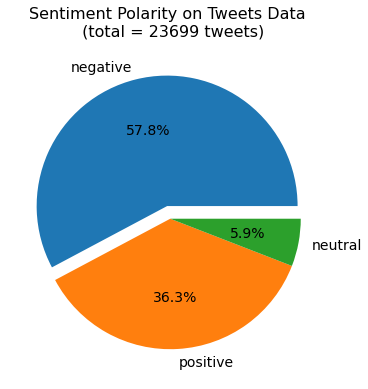

In [25]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data \n (total = 23699 tweets)', fontsize = 16, pad = 20)
plt.show()

In [26]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['tweet', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,tweet,polarity_score,polarity
1,"[1, pasien, positif, covid, 19, nyata, sembuh, jalan, awat, 94, rsd, bagas, waras, total, pasien, positif, covid, 19, rawat, 17, orang, 2, pdp, 1, odp, bantu, perintah, tenaga, medis, disiplin, patuh, protokol, sehat]",35,positive
2,"[jokowi, janji, perintah, pusat, dukung, bid, sehat, surat, pemberitahuan, tuang, undang, undang, no, 2, 2020, sgr, realisasi, perintah, peduli, tenaga, medis, garda, covid, 19, alhamdulillah, syukur, partai, demokrat, peduli, tenaga, medis]",33,positive
3,"[perintah, effort, harga, kerja, tenaga, sehat, libat, langsung, tangan, covid, 19, hak, gelar, pegawai, negeri, sipil, skd, skb, praktik, nilai, nilai, skd, skb, langsung, bkngoid]",33,positive
4,"[1, pasien, positif, covid, 19, nyata, sembuh, 2, pasien, positif, covid, 19, total, pasien, positif, covid, 19, rawat, rsd, bagas, waras, 10, orang, masker, cuci, tangan, mari, patuh, protokol, sehat, perintah]",33,positive
5,"[tolng, perintah, peka, peduli, tenaga, kerja, indonesia, tenaga, kerja, wanita, tenaga, kerja, indonesia, tenaga, kerja, wanita, rakyat, brhak, bntuan, covid, 19, sedng, berlngsung, tenaga, kerja, indonesia, tenaga, kerja, wanita, mmatuhi, perturn, kerja, dtmpat, tanggal]",33,positive
6,"[syukur, tunjang, raya, terima, hak, orang, sabar, sayang, tuhan, selamat, raya, lebaran, keluarga, selamat, tidur, doa, a, dukung, perintah, swasta, cegah, virus, corona, dukung, gugus, tugas, covid, 19, merdeka]",32,positive
7,"[lihat, terap, new, normal, salat, jumat, turki, lihat, terap, new, normal, salat, jumat, turki, perintah, turki, buka, masjid, sebar, covid, 19, kendali, salat, jumat]",32,positive
8,"[alhamdulillah, covid, 19, redam, negara, mayoritas, umat, islam, disiplin, salat, 5, ber, do, a, dasar, kuat, ber, disiplin, patuh, atur, perintah, fatwa, majelis, ulama, indonesia, jke, bangga, negara, mayoritas, muslim, covid, 19, cepat, asia, tenggara]",31,positive
9,"[shaff, salat, jumat, lurus, rapi, protokol, sehat, covid, 19, terap, penuh, masjid, al, akbar, surabaya, barokallah, moga, masjid, masjid, protokol, sehat, sesuai, arah, perintah, jumat, 19, juni, 2020]",30,positive
10,"[terima, kasih, tim, medis, kerja, keras, taruh, nyawa, manusia, sehat, semangat, mari, ringan, kerja, jaga, sehat, protokol, sehat, covid, 19, patuh, anjurah, himbauan, perintah]",29,positive


In [27]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets[['tweet', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:10]

,tweet,polarity_score,polarity
1,"[orang, jenazah, mati, gara, gara, jambret, gagar, otak, bilang, covid, salah, jemput, paksa, rumah, sakit, dokter, kesini, biadab, main, pakai, hukum, orang, salah, bilang, salah, hukum, curi, jenazah, media, perintah, otak, gesrek]",-50,negative
2,"[pandemi, covid, 19bantu, perintah, minimal, serang, nyinyir, berita, bikin, judul, berita, dasar, ujung, ujung, fitnah, bukti, sampah, negara, kontribusi, rugi, dasar, sampah]",-49,negative
3,"[hamil, rentan, kena, sakit, gampang, stres, covid, hamil, eh, kena, cacar, cacat, parah, anak, tinggal, kandung, perintah, saran, tunda, hamil]",-49,negative
4,"[covid, 19, bahaya, 1k, tangan, tim, medis, bahaya, beda, cerita, bos, gilir, amit, amit, keluarga, kena, dampak, langsung, salah, perintah, goblok, alah, anjing, pusing, ah, bodoamat]",-49,negative
5,"[perintah, orang, tua, masyarakat, anak, orang, tua, suruh, anak, anak, tes, covid, anak, anak, tolak, orang, anak, anak, tolak, tes, ketidakpercayaan, anak, orang, tua, numpuk2, rapidtest]",-46,negative
6,"[3, positiv, covid, 19, turun, fakta, ratus, kpps, tinggal, pilih, tim, cari, fakta, bebas, cari, mala, perintah, anggap, tim, cari, fakta, fakta]",-44,negative
7,"[tuju, ajar, aparatur, sipil, negara, nyinyir, perintah, surat, pemberitahuan, subordinasi, mesti, dululah, aparatur, sipil, negara, bebas, nyinyir, nyinyir, kritik, olok, olok, perintah, sah, juang, fasilitas, rakyat, lawan, covid]",-43,negative
8,"[sakit, covid, 19, orang, cilik, kelas, bebas, sakit, bawa, masuk, sakit, tualang, negara, finansial, ragu, perintah, wasit, cari, untung, devisa, proyek, bijak, amburadul, turun, jalan]",-42,negative
9,"[larang, cela, perintah, khusus, wabah, artikel, terang, larang, haram, cela, umbar, aib, jelek, perintah, kaum, muslimin, khusus, wabah, covid, 19]",-41,negative
10,"[bicara, komunikasi, perintah, salah, tangan, covid, gagal, mulu, urus, mudik, gagal, psbb, gagal, ambil, jenazah, gagal, masker, gagal, jaga, jarak, pasar, gagal, wktnya, pikir, solusi, komunikasi]",-41,negative


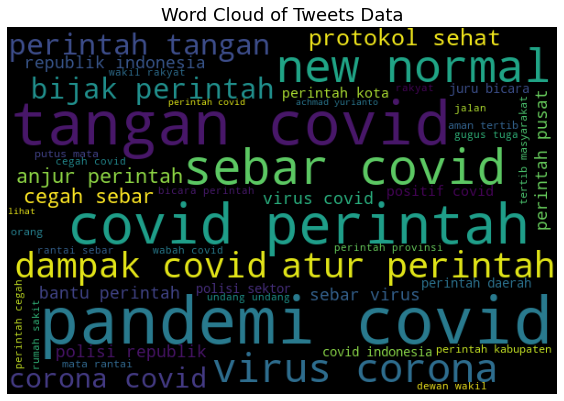

In [28]:
# Visualize word cloud

list_words=''
for tweet in tweets['tweet']:
    for word in tweet:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()


In [29]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

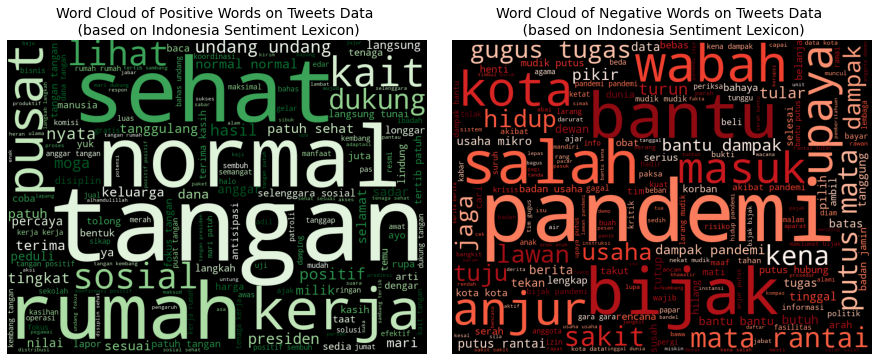

In [30]:
# Visualize positive and negative word cloud

sentiment_words = tweets['tweet'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

### Model Definition and Training

In [31]:
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [32]:
# Make text preprocessed (tokenized) to untokenized with toSentence Function
X = tweets['tweet'].apply(toSentence) 
max_features = 5000

# Tokenize text with specific maximum number of words to keep, based on word frequency
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape

(36851, 48)

In [33]:
# Encode target data into numerical values
polarity_encode = {'negative' : 0, 'neutral' : 1, 'positive' : 2}
y = tweets['polarity'].map(polarity_encode).values

In [34]:
# Split the data (with composition data train 80%, data test 20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
#X_validation,X_holdouttest,y_validation,y_holdouttest = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [36]:
print(len(X),len(X_train),len(X_test))

36851 29480 7371


In [37]:
!pip install keras.optimizers

ERROR: Could not find a version that satisfies the requirement keras.optimizers (from versions: none)
ERROR: No matching distribution found for keras.optimizers


LSTM Model

In [38]:
# Create model function with default hyperparameter values
import keras
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

def create_model(embed_dim = 16, hidden_unit = 16, dropout_rate = 0.2, optimizers = Adam, learning_rate = 0.001):
    model = Sequential()
    model.add(Embedding(input_dim = max_features, output_dim = embed_dim, input_length = X_train.shape[1]))
    model.add(LSTM(units = hidden_unit, activation = 'tanh'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units = 3, activation = 'softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(lr = learning_rate), metrics = ['accuracy'])
    print(model.summary())
    return model

In [39]:
# Hyperparameter tuning (to know the best hyperparameter for
#from keras.wrappers.scikit_learn import KerasClassifier 
#from sklearn.model_selection import GridSearchCV

# Wrapper model with default hyperparameter values
#model = KerasClassifier(build_fn = create_model, epochs = 25, batch_size=128) 

# Hyperparameters
#embed_dim = [32, 64]
#hidden_unit = [16, 32, 64]
#dropout_rate = [0.2]
#optimizers = [Adam, RMSprop]
#learning_rate = [0.01, 0.001, 0.0001]
#epochs = [10, 25, 50, 100]
#batch_size = [128, 256]
#param_grid = dict(embed_dim = embed_dim, hidden_unit = hidden_unit, dropout_rate = dropout_rate,
#                   learning_rate = learning_rate, optimizers = optimizers, epochs = epochs, batch_size = batch_size)

# Evaluation model with GridSearchCV to know what the best hyperparameter for model 
#grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)
#grid_result = grid.fit(X_train, y_train)
#
#results = pd.DataFrame()
#results['means'] = grid_result.cv_results_['mean_test_score']
#results['stds'] = grid_result.cv_results_['std_test_score']
#results['params'] = grid_result.cv_results_['params']
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


hypertuning parameter with gridsearchcv (notebook for gridsearch is in another file)

In [40]:
#results.to_csv('/content/drive/MyDrive/final_project/gridsearchcv_results.csv', index = False, header = True)
#results.to_csv('gridsearchcv_results.csv', index = False, header = True) 
#results.sort_values(by='means', ascending = False).reset_index(drop=True)

In [41]:
# Results from hyperparameter tuning
results = pd.read_csv('/content/drive/MyDrive/final_project/gridsearchcv_results.csv')
results.sort_values(by='means', ascending = False).reset_index(drop=True)

,means,stds,params
0,0.885957,0.001199,"{'batch_size': 256, 'dropout_rate': 0.2, 'embed_dim': 32, 'epochs': 10, 'hidden_unit': 64, 'learning_rate': 0.001, 'optimizers': <class 'keras.optimizer_v2.rmsprop.RMSprop'>}"
1,0.884430,0.003263,"{'batch_size': 256, 'dropout_rate': 0.2, 'embed_dim': 32, 'epochs': 10, 'hidden_unit': 64, 'learning_rate': 0.001, 'optimizers': <class 'keras.optimizer_v2.adam.Adam'>}"
2,0.883921,0.000552,"{'batch_size': 256, 'dropout_rate': 0.2, 'embed_dim': 64, 'epochs': 10, 'hidden_unit': 32, 'learning_rate': 0.001, 'optimizers': <class 'keras.optimizer_v2.rmsprop.RMSprop'>}"
3,0.882598,0.000979,"{'batch_size': 256, 'dropout_rate': 0.2, 'embed_dim': 32, 'epochs': 10, 'hidden_unit': 16, 'learning_rate': 0.001, 'optimizers': <class 'keras.optimizer_v2.rmsprop.RMSprop'>}"
4,0.880427,0.001799,"{'batch_size': 256, 'dropout_rate': 0.2, 'embed_dim': 32, 'epochs': 10, 'hidden_unit': 16, 'learning_rate': 0.001, 'optimizers': <class 'keras.optimizer_v2.adam.Adam'>}"
...,...,...,...
283,0.768725,0.021735,"{'batch_size': 128, 'dropout_rate': 0.2, 'embed_dim': 32, 'epochs': 10, 'hidden_unit': 16, 'learning_rate': 0.0001, 'optimizers': <class 'keras.optimizer_v2.rmsprop.RMSprop'>}"
284,0.768148,0.024795,"{'batch_size': 256, 'dropout_rate': 0.2, 'embed_dim': 32, 'epochs': 10, 'hidden_unit': 64, 'learning_rate': 0.0001, 'optimizers': <class 'keras.optimizer_v2.rmsprop.RMSprop'>}"
285,0.754712,0.055389,"{'batch_size': 256, 'dropout_rate': 0.2, 'embed_dim': 64, 'epochs': 10, 'hidden_unit': 16, 'learning_rate': 0.0001, 'optimizers': <class 'keras.optimizer_v2.rmsprop.RMSprop'>}"
286,0.737280,0.015077,"{'batch_size': 256, 'dropout_rate': 0.2, 'embed_dim': 32, 'epochs': 10, 'hidden_unit': 32, 'learning_rate': 0.0001, 'optimizers': <class 'keras.optimizer_v2.rmsprop.RMSprop'>}"


In [42]:
# using parameter from gridsearch
# {'batch_size': 256, 'dropout_rate': 0.2, 'embed_dim': 32, 'epochs': 10, 'hidden_unit': 64, 'learning_rate': 0.001, 'optimizers': <class 'keras.optimizer_v2.rmsprop.RMSprop'>}

embed_dim = 32
hidden_unit = 64
dropout_rate = 0.2
optimizers = RMSprop
learning_rate = 0.001

model1 = Sequential()
model1.add(Embedding(input_dim = max_features, output_dim = embed_dim, input_length = X_train.shape[1]))
model1.add(LSTM(units = hidden_unit, activation = 'tanh'))
model1.add(Dropout(dropout_rate))
model1.add(Dense(units = 3, activation = 'softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(lr = learning_rate), metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [43]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 48, 32)            160000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 185,027
Trainable params: 185,027
Non-trainable params: 0
_________________________________________________________________


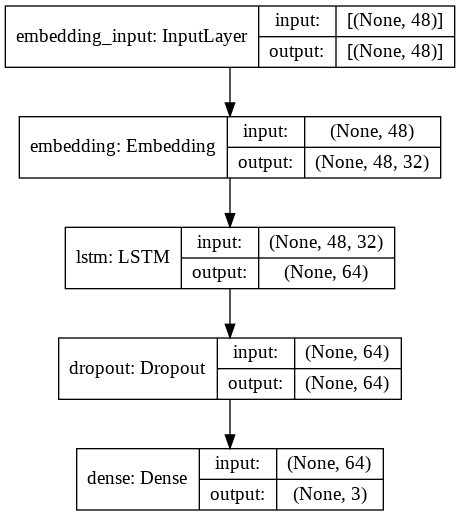

In [44]:
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(model1, "model1_function.png", show_shapes=True)

In [45]:
model_prediction = model1.fit(X_train, y_train,
                        epochs=10, batch_size=256, validation_split = 0.1, verbose = 2)

Epoch 1/10
104/104 - 6s - loss: 0.7909 - accuracy: 0.6437 - val_loss: 0.6271 - val_accuracy: 0.7975
Epoch 2/10
104/104 - 1s - loss: 0.4849 - accuracy: 0.8300 - val_loss: 0.4106 - val_accuracy: 0.8538
Epoch 3/10
104/104 - 1s - loss: 0.3520 - accuracy: 0.8775 - val_loss: 0.3546 - val_accuracy: 0.8748
Epoch 4/10
104/104 - 1s - loss: 0.2881 - accuracy: 0.8968 - val_loss: 0.3681 - val_accuracy: 0.8745
Epoch 5/10
104/104 - 1s - loss: 0.2494 - accuracy: 0.9077 - val_loss: 0.3310 - val_accuracy: 0.8826
Epoch 6/10
104/104 - 1s - loss: 0.2257 - accuracy: 0.9127 - val_loss: 0.3282 - val_accuracy: 0.8911
Epoch 7/10
104/104 - 1s - loss: 0.2077 - accuracy: 0.9174 - val_loss: 0.3237 - val_accuracy: 0.8942
Epoch 8/10
104/104 - 1s - loss: 0.1945 - accuracy: 0.9238 - val_loss: 0.3282 - val_accuracy: 0.8989
Epoch 9/10
104/104 - 1s - loss: 0.1819 - accuracy: 0.9309 - val_loss: 0.3404 - val_accuracy: 0.8962
Epoch 10/10
104/104 - 1s - loss: 0.1726 - accuracy: 0.9372 - val_loss: 0.3516 - val_accuracy: 0.8972

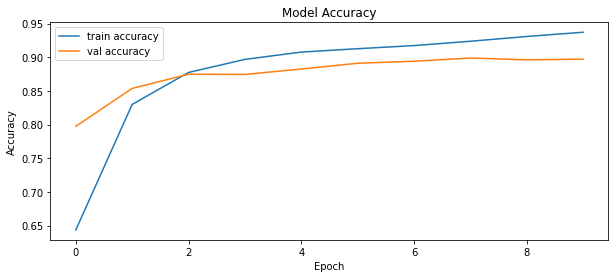

In [48]:
# Visualization model accuracy (train and val accuracy)

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(model_prediction.history['accuracy'], label = 'train accuracy')
ax.plot(model_prediction.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

In [55]:
y_pred = model1.predict(X_test)

In [56]:
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [58]:
model_LSTM_results = calculate_results(y_true= y_test, 
                                    y_pred= y_pred.argmax(axis=1))
model_LSTM_results

{'accuracy': 89.44512277845611,
 'f1': 0.8848929707953753,
 'precision': 0.8848150775940699,
 'recall': 0.8944512277845611}

### Model Inference

In [63]:
# Initializing and preprocessing new text data
otherData = pd.DataFrame()
otherData['text'] = [
                     'kebijakan kalo masyarakatnya ga patuh juga malah ga bener, semoga covid ini cepat berlalu deh' 
                    ]

#df['tweet'] = df['tweet'].apply(preprocess).apply(preprocess)

otherData['tweet'] = otherData['text'].apply(preprocess).apply(preprocess)
#otherData.drop(['text'], axis = 1, inplace = True)
otherData

,text,tweet
0,"kebijakan kalo masyarakatnya ga patuh juga malah ga bener, semoga covid ini cepat berlalu deh",bijak masyarakat patuh moga covid cepat deh


In [64]:
# Preprocessing text data

# Make text preprocessed (tokenized) to untokenized with toSentence Function
X_otherData = otherData['tweet'].apply(toSentence)
X_otherData = tokenizer.texts_to_sequences(X_otherData.values)
X_otherData = pad_sequences(X_otherData, maxlen = X.shape[1])
X_otherData

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,  888,  347, 2379,
         349,  772,  349,  349, 2097,  349,  772,  349,  564, 1246,  349,
         564,  331, 1879,  349,  887, 1879, 1439,  347,  887,  598, 1246,
         349,  564,  598,  331]], dtype=int32)

In [67]:
predict = model1.predict(X_otherData)
predict.argmax(axis=1)

array([2])

In [69]:
# Results from prediction sentiment on text data

y_pred_otherData = model1.predict(X_otherData)
otherData['Result Prediction'] = predict.argmax(axis=1)

polarity_decode = {0 : 'Negative', 1 : 'Neutral', 2 : 'Positive'}
otherData['Result Prediction'] = otherData['Result Prediction'].map(polarity_decode)
otherData

,text,tweet,Result Prediction
0,"kebijakan kalo masyarakatnya ga patuh juga malah ga bener, semoga covid ini cepat berlalu deh",bijak masyarakat patuh moga covid cepat deh,Positive


In [62]:
model1.save('/content/drive/MyDrive/final_project/model.h5')

#results = pd.read_csv('/content/drive/MyDrive/final_project/gridsearchcv_results.csv)

extras

In [70]:


import subprocess
from ast import literal_eval

def run(command):
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE)
    out, err = process.communicate()
    print(out.decode('utf-8').strip())
          
print('# CPU')
run('cat /proc/cpuinfo | egrep -m 1 "^model name"')
run('cat /proc/cpuinfo | egrep -m 1 "^cpu MHz"')
run('cat /proc/cpuinfo | egrep -m 1 "^cpu cores"')
          
print('# RAM')
run('cat /proc/meminfo | egrep "^MemTotal"')
          
print('# OS')
run('uname -a')



# CPU
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
cpu MHz		: 2199.998
cpu cores	: 2
# RAM
MemTotal:       26696416 kB
# OS
Linux dc93caa988c9 5.4.104+ #1 SMP Sat Jun 5 09:50:34 PDT 2021 x86_64 x86_64 x86_64 GNU/Linux
